In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import feature_selection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split




In [107]:
df_train = pd.read_csv("train.csv")

In [108]:
valid_df = pd.read_csv("test.csv")

In [137]:
all_df = [df_train,valid_df]

In [109]:
print(df_train.shape)

(891, 12)


In [110]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [111]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [112]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Baclini, Mrs. Solomon (Latifa Qurban)",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [114]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/len(df_train)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [115]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

In [116]:
df_train.loc[df_train['Embarked'].isnull()].index


Int64Index([61, 829], dtype='int64')

In [117]:
df_train.drop([61,829], inplace= True, axis = 0)

In [118]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/len(df_train)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Cabin,687,0.772778
Embarked,0,0.000000
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Age,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


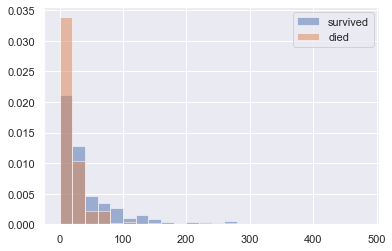

In [119]:
fare_survived=df_train.loc[df_train['Survived']==1, 'Fare']
fare_died=df_train.loc[df_train['Survived']==0, 'Fare']
plt.hist(fare_survived, bins=np.arange(0,500,20), alpha=0.5, label='survived', density=True)
plt.hist(fare_died, bins=np.arange(0,500,20), alpha=0.5, label='died', density=True)
plt.legend()

D:\Programi\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programi\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


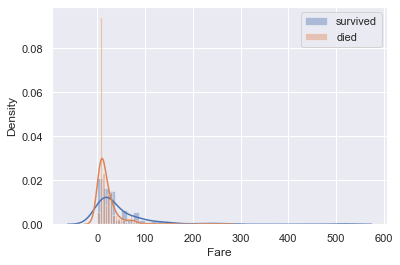

In [120]:
age_survived=df_train.loc[df_train['Survived']==1, 'Age']
age_died=df_train.loc[df_train['Survived']==0, 'Age']
sns.distplot(fare_survived, label='survived')
sns.distplot(fare_died, label='died')
plt.legend()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

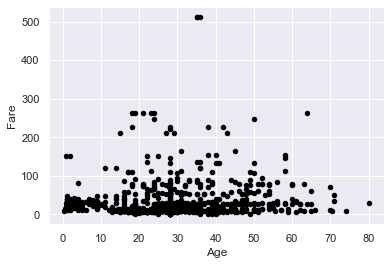

In [121]:
df_train.plot.scatter(x='Age', y='Fare', c="black")

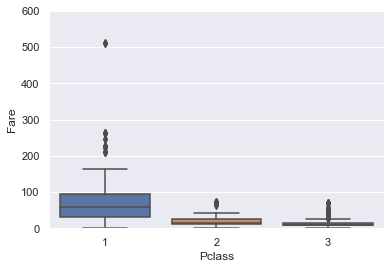

In [122]:
fig = sns.boxplot(x='Pclass', y="Fare", data=df_train)
fig.axis(ymin=0, ymax=600);

## 1.4 Međusobni odnosi (korelacija) numeričkih varijabli

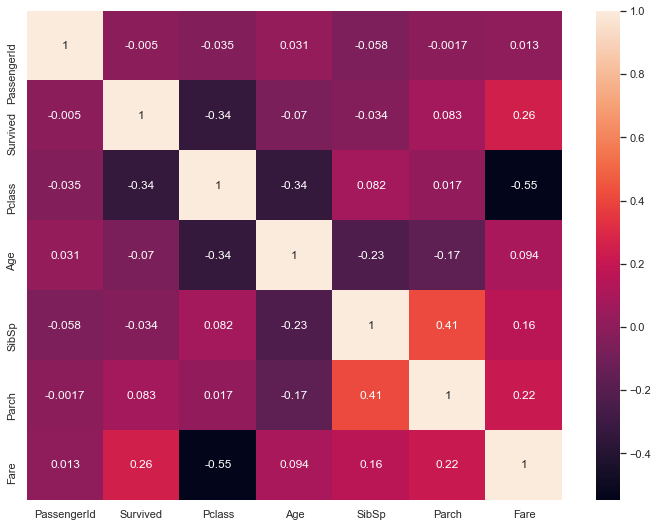

In [123]:
corr = df_train.corr()
f = plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True);

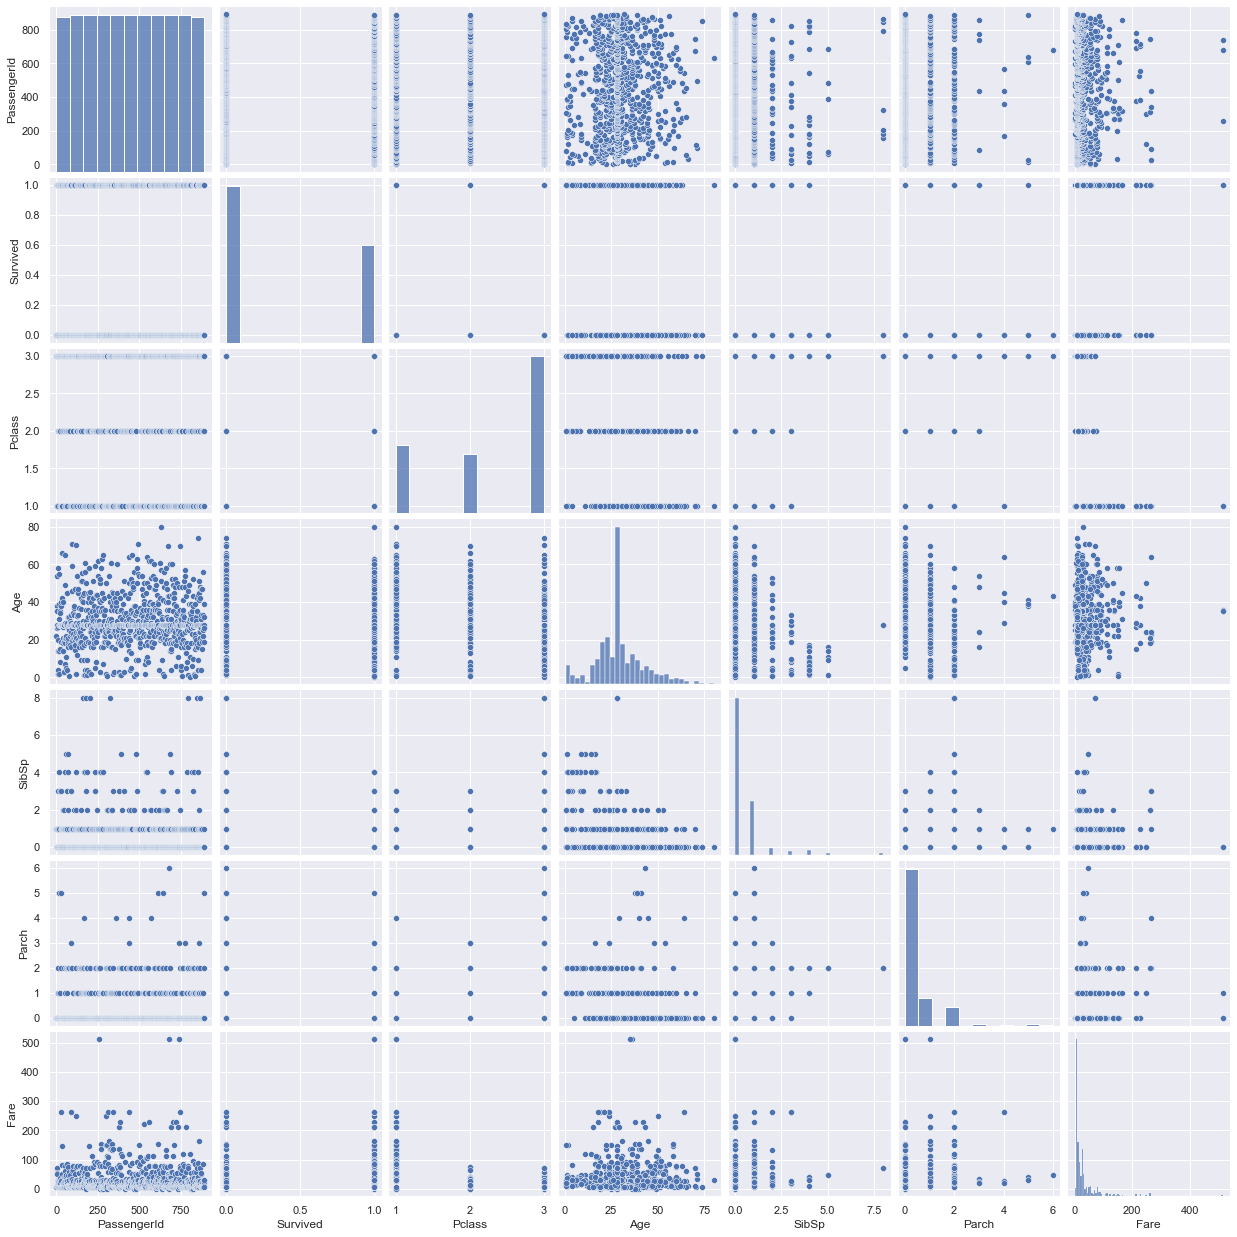

In [124]:
sns.set()
sns.pairplot(df_train, height = 2.5)
plt.show();

In [125]:
categorical_feats = np.concatenate((df_train.dtypes[df_train.dtypes == "int64"].index, df_train.dtypes[df_train.dtypes == "object"].index))
print("Number of Categorical features: ", len(categorical_feats))

for catg in list(categorical_feats) :
    print(df_train[catg].value_counts())
    print('#'*50)

Number of Categorical features:  10
891    1
293    1
304    1
303    1
302    1
      ..
590    1
589    1
588    1
587    1
1      1
Name: PassengerId, Length: 889, dtype: int64
##################################################
0    549
1    340
Name: Survived, dtype: int64
##################################################
3    491
1    214
2    184
Name: Pclass, dtype: int64
##################################################
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
##################################################
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
##################################################
Baclini, Mrs. Solomon (Latifa Qurban)            1
Dick, Mrs. Albert Adrian (Vera Gillespie)        1
Ford, Miss. Doolina Margaret "Daisy"             1
Sivic, Mr. Husein                                1
Olsvigen, Mr. Thor Anderson                      1
                               

Razne korisne vizualizacije

In [126]:
pd.crosstab(df_train['Pclass'],df_train['Sex']).style.background_gradient(cmap='summer_r')

Sex,female,male
Pclass,,
1,92,122
2,76,108
3,144,347


In [127]:
pd.crosstab(df_train['Pclass'],df_train['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


<AxesSubplot:xlabel='Pclass', ylabel='count'>

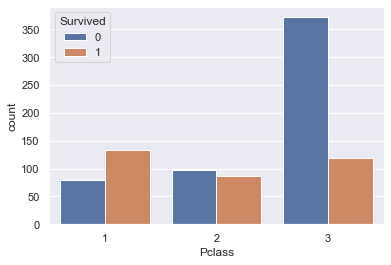

In [128]:
sns.countplot(x='Pclass',hue='Survived',data=df_train)


<AxesSubplot:xlabel='Sex', ylabel='Fare'>

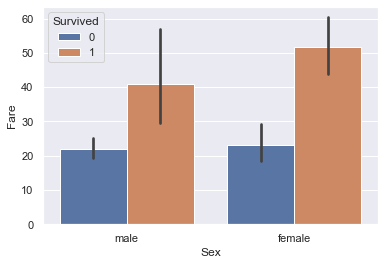

In [129]:
sns.barplot(x='Sex',y='Fare',hue='Survived',data=df_train)


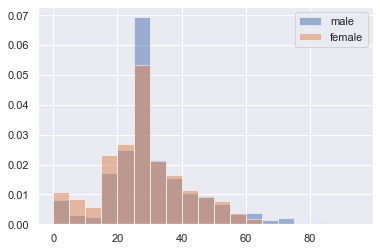

In [130]:
hist_a=plt.hist(df_train.loc[df_train['Sex']=='male','Age'], bins=np.arange(0,100,5), alpha=.50, density=True, label='male')
#fig = plt.figure()
hist_b=plt.hist(df_train.loc[df_train['Sex']=='female','Age'], bins=np.arange(0,100,5), alpha=.50, density=True, label='female')
plt.legend()

<AxesSubplot:>

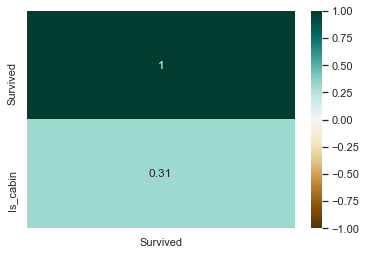

In [136]:
Cabin_df = df_train[['Survived','Cabin']].copy()
Cabin_df['Is_cabin'] = Cabin_df.Cabin.notnull()
sns.heatmap(Cabin_df.corr()[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [138]:
for df in all_df :
    df['Cabin'] = Cabin_df.Cabin.str[0]
    df.Cabin.fillna('N',inplace= True)

In [141]:
for df in all_df:
    df['Title'] = df_train.Name.str.split(".",expand=True)[0].str.split(', ',expand=True)[1]

df_train.Title.value_counts() 

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Jonkheer          1
Ms                1
Sir               1
Mme               1
the Countess      1
Don               1
Lady              1
Capt              1
Name: Title, dtype: int64

In [131]:
X = df_train.drop(['Survived'],axis = 1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state= 0 )
print('X_train size :',X_train.shape ,', X_test size :',X_test.shape)

X_train size : (622, 11) , X_test size : (267, 11)


In [132]:
cat_attribs = ['Sex','Cabin','Embarked']

cat_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [133]:
num_attribs = ['Age','SibSp', 'Parch', 'Fare']

num_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy='median')),
        ('std_scaler',StandardScaler())
])

In [134]:
Final_pipeline = ColumnTransformer([
            ('num',num_pipeline,num_attribs),
            ('cat',cat_pipeline,cat_attribs)
])

#train_test_split
X_train = Final_pipeline.fit_transform(X_train)
X_test = Final_pipeline.fit_transform(X_test)

#Train, Valid df
X = Final_pipeline.fit_transform(X)


In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_val_score

In [146]:
lr = LogisticRegression(max_iter=1000)

In [147]:
cv_l = cross_val_score(lr,X,y,cv=5)
print(cv_l)
print(cv_l.mean())

[0.79213483 0.79775281 0.7752809  0.7752809  0.81355932]
0.7908017520472291


In [148]:
tc = DecisionTreeClassifier()

In [149]:
cv_tc = cross_val_score(tc,X,y,cv=5)
print(cv_tc)
print(cv_tc.mean())

[0.75842697 0.75280899 0.80898876 0.7752809  0.8079096 ]
0.7806830444994602


In [154]:
knc = KNeighborsClassifier()

In [155]:
cv_knc = cross_val_score(knc,X,y,cv=5)
print(cv_knc)
print(cv_knc.mean())

[0.80898876 0.7752809  0.78089888 0.79775281 0.83050847]
0.7986859645781756


In [156]:
rfc = RandomForestClassifier()

In [157]:
cv_rfc = cross_val_score(rfc,X,y,cv=5)
print(cv_rfc)
print(cv_rfc.mean())

[0.82022472 0.79775281 0.83146067 0.76404494 0.81355932]
0.8054084936202628


In [161]:
from sklearn.model_selection import GridSearchCV

In [158]:
all_est = [
            ('Random_forest',rfc)
            ]

In [159]:
grid_param = [
            
            #RandomForestClassifier

            [{
            'n_estimators': [10,50,100,200,300],
            'criterion': ['gini', 'entropy'],
            'max_depth': [8,10,12],
            'random_state': [0]
             }]
    
           
            ]

In [162]:
tuned_all_est = all_est.copy()

for model,param in zip (tuned_all_est,grid_param):
    best_search = GridSearchCV(model[1],param_grid = param,cv = 5)
    best_search.fit(X,y)
    best_param = best_search.best_params_
    model[1].set_params(**best_param) 
    print('[',model[0],']')
    print('Best Score: ' + str(best_search.best_score_))
    print('Best Parameters: ' + str(best_search.best_params_))
    print('--'*30)

[ Random_forest ]
Best Score: 0.8166698406652702
Best Parameters: {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 10, 'random_state': 0}
------------------------------------------------------------
